In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek 
from collections import Counter
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
df= pd.read_csv('adult.csv')

In [3]:
df["id"]=np.arange(df.shape[0])

In [4]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,id
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,2
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,3
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,32556
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,32557
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,32558
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,32559


In [5]:
df[df["income"]==">50K"].describe().T

,count,mean,std,min,25%,50%,75%,max
age,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0
fnlwgt,7841.0,188005.000000,102541.775472,14878.0,119101.0,176101.0,230959.0,1226583.0
education.num,7841.0,11.611657,2.385129,2.0,10.0,12.0,13.0,16.0
capital.gain,7841.0,4006.142456,14570.378951,0.0,0.0,0.0,0.0,99999.0
capital.loss,7841.0,195.001530,595.487574,0.0,0.0,0.0,0.0,3683.0
hours.per.week,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0
id,7841.0,13257.719934,10287.950519,7.0,2726.0,12014.0,22444.0,32558.0


In [6]:
num_columns=list(set(df.describe().columns)-set(["id"]))
cat_columns=list(set(df.columns) - set(num_columns)- set(["id"]))
len(cat_columns)

9

In [7]:
df[["education","education.num"]].tail(70
                                      )

,education,education.num
32491,HS-grad,9
32492,Some-college,10
32493,Some-college,10
32494,Some-college,10
32495,HS-grad,9
...,...,...
32556,Some-college,10
32557,Assoc-acdm,12
32558,HS-grad,9
32559,HS-grad,9


## `visualutions`

In [8]:
df_list=[]
for cat_column in cat_columns:
    df_list.append(df.groupby([cat_column])['id'].count().reset_index().rename(columns = {'id' : 'count'}))

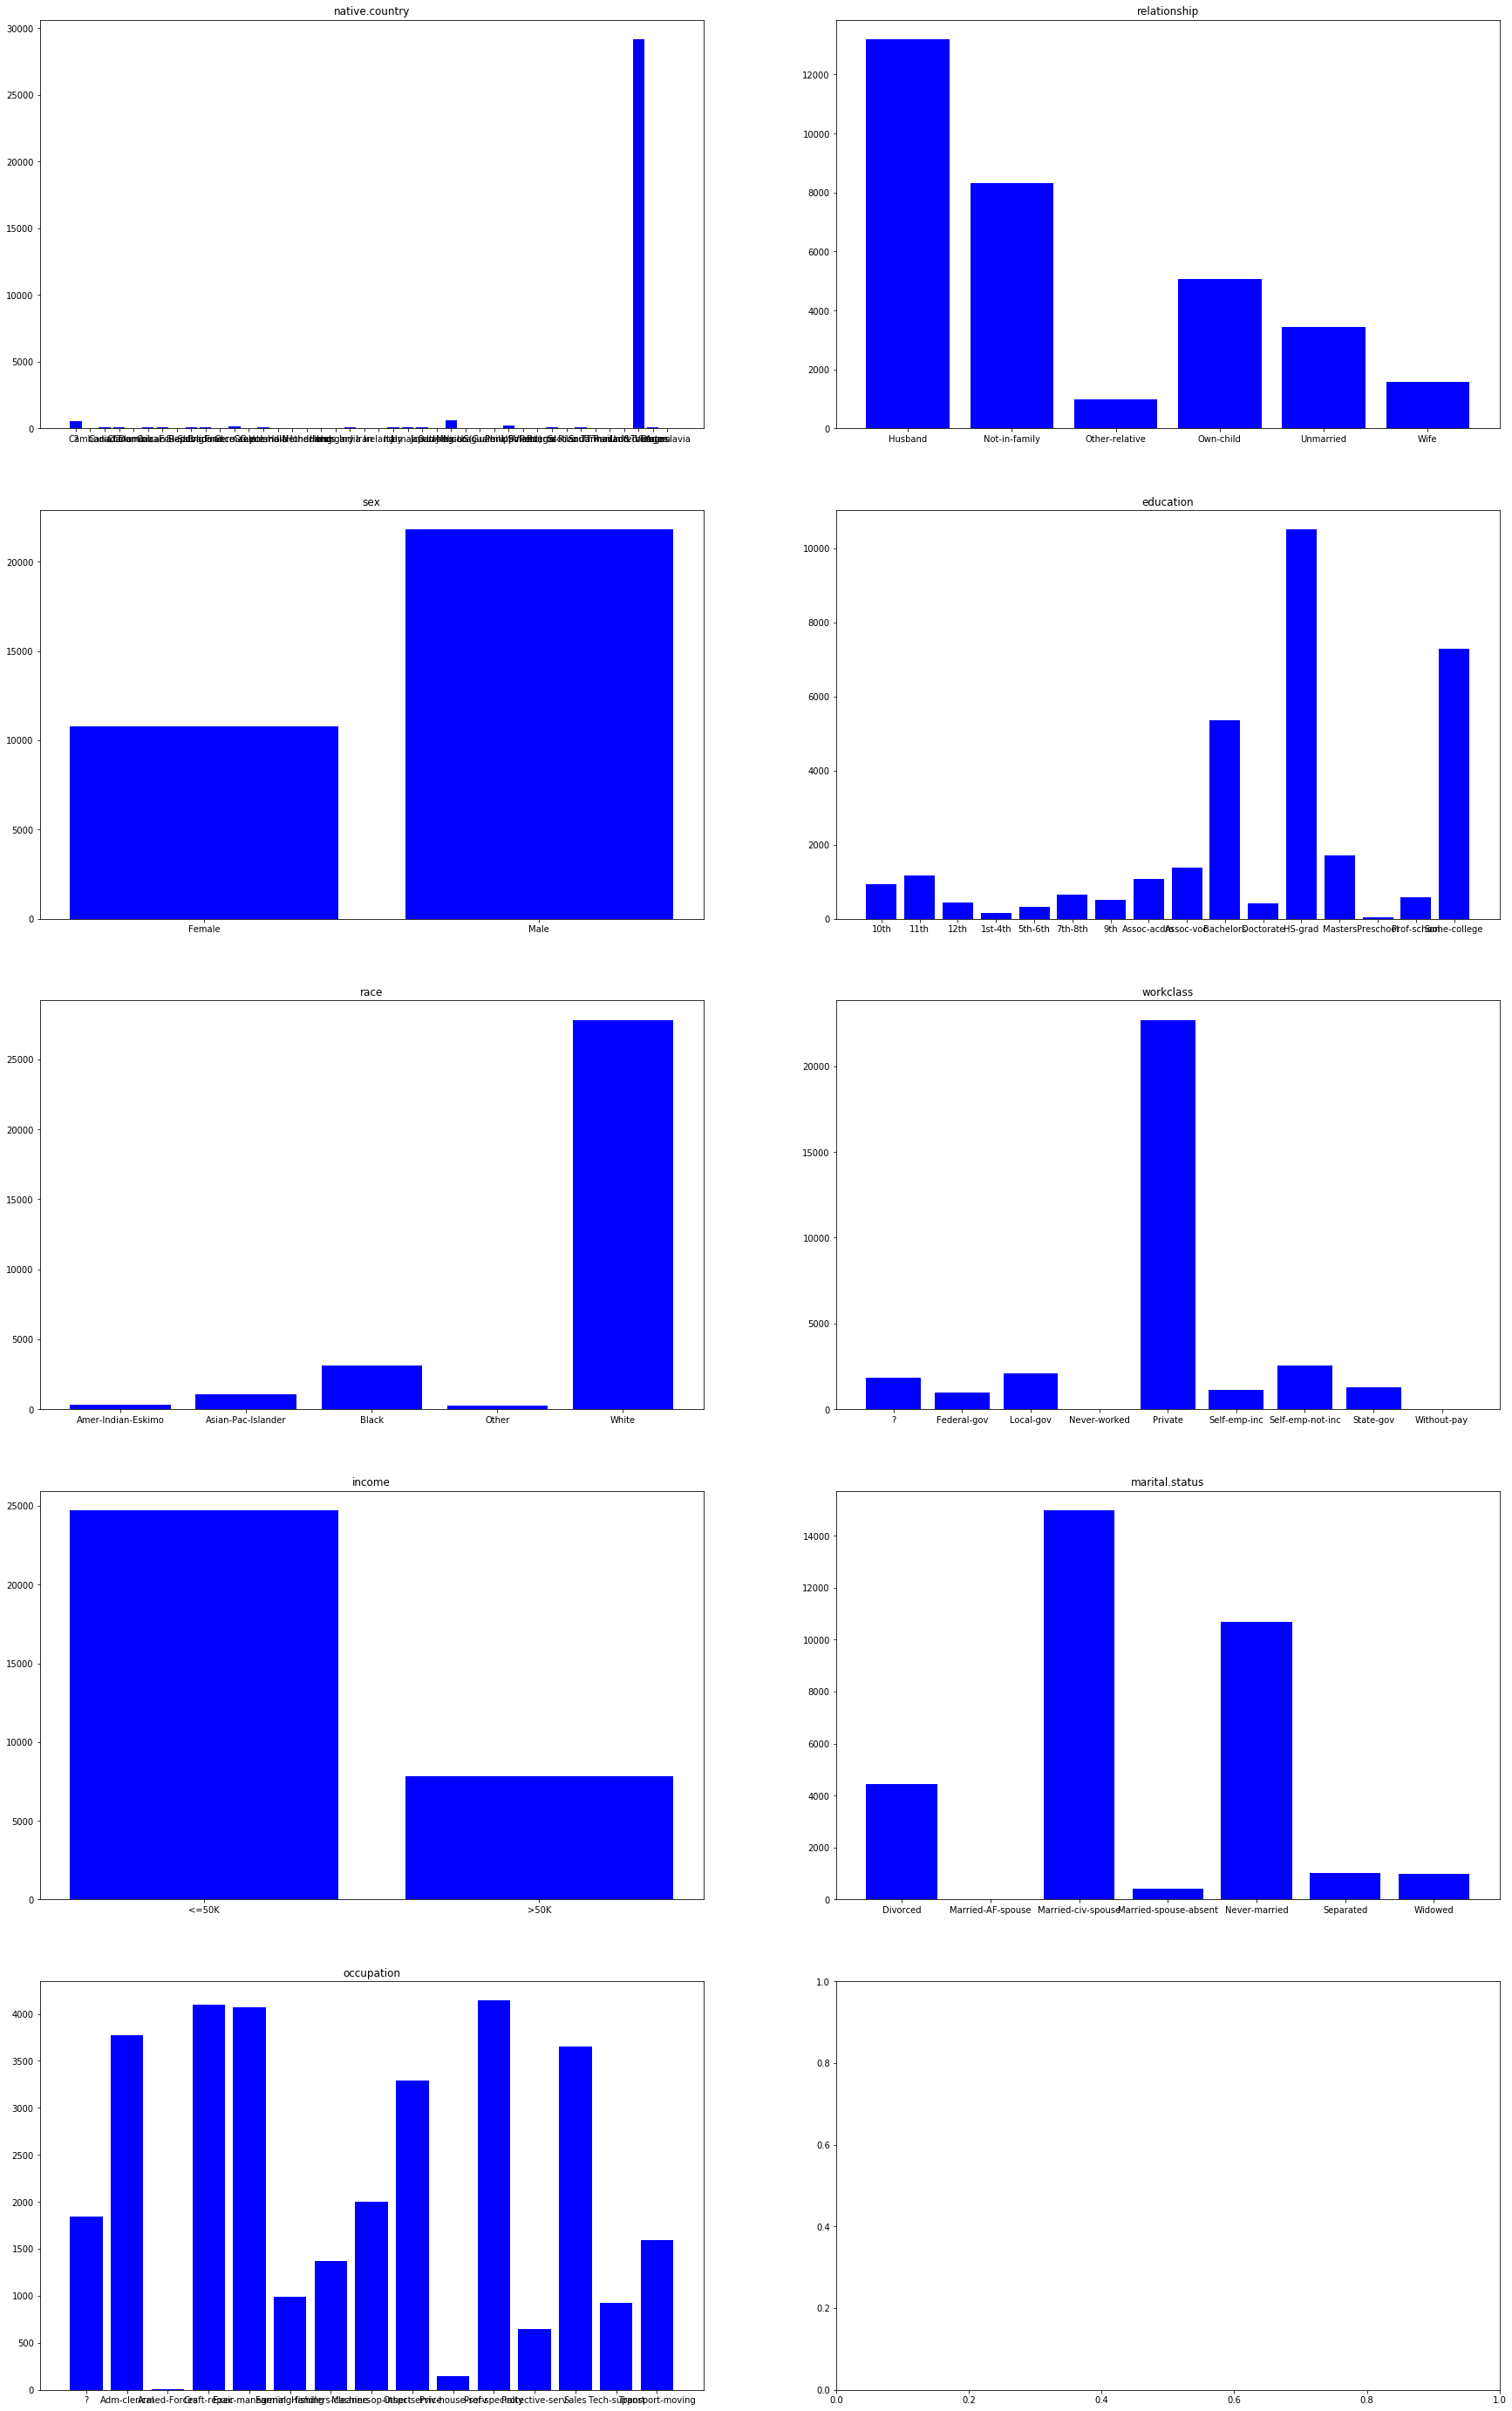

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for d in df_list[0:10]:
    axes[i, j].bar(d.iloc[:, 0],d.iloc[:, 1], color ='blue')
    axes[i, j].set_title(d.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

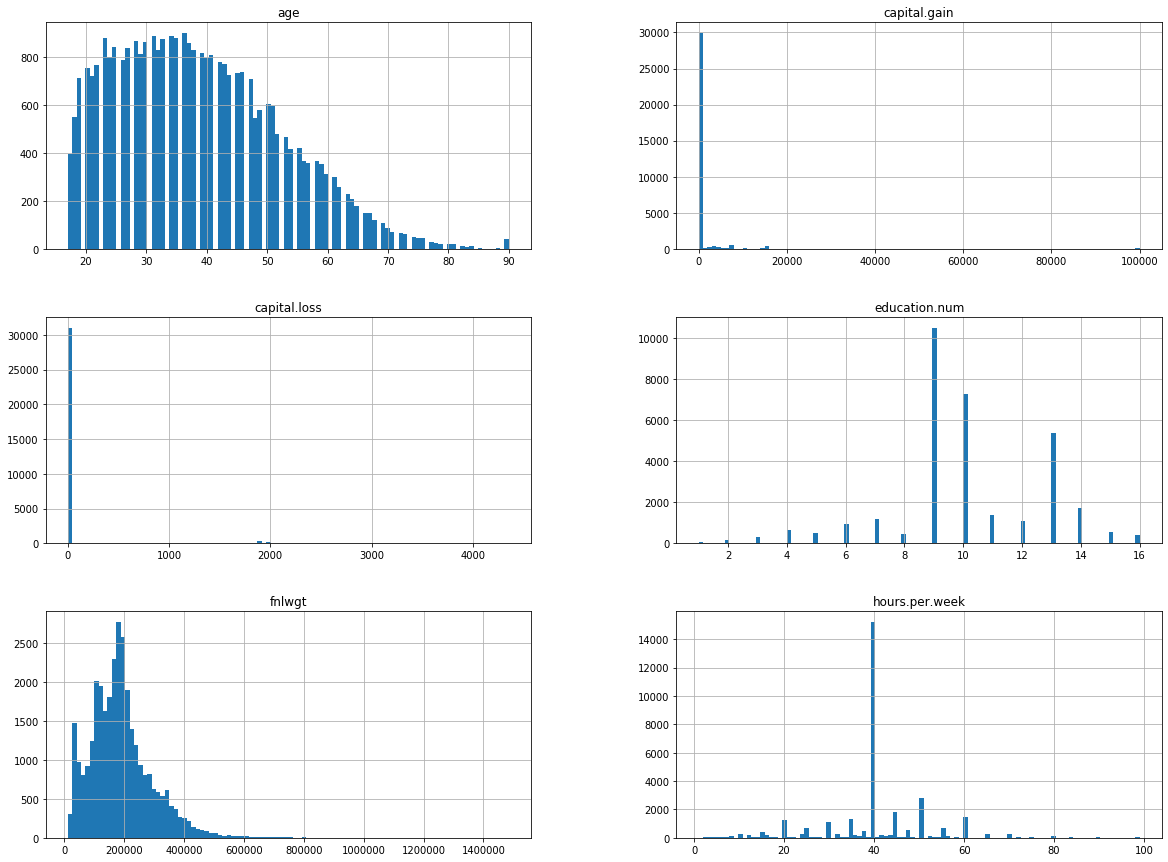

In [10]:
df[num_columns].hist(bins=100,figsize=(20,15));

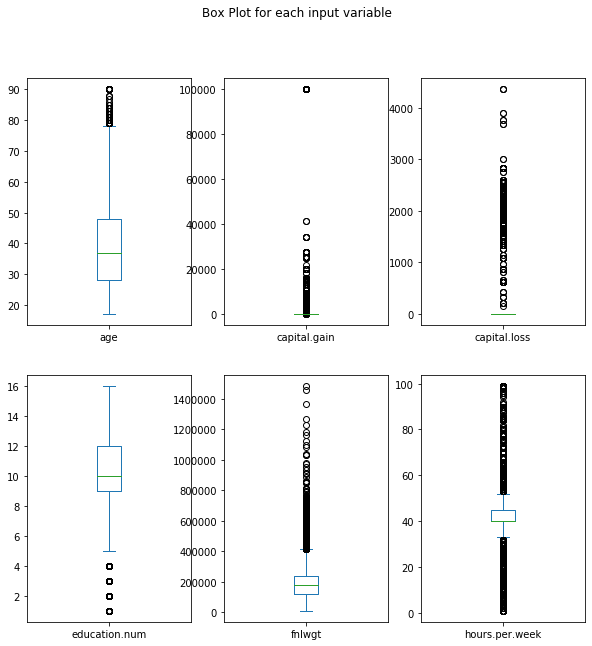

In [11]:
#Box Plot for each input variable
df[num_columns].plot(kind="box",subplots=True,figsize=(10,10),layout=(2,3),title="Box Plot for each input variable");

## `Data Preprocessing`

### `Dealing with nulls`

In [12]:
df.isna().sum().reset_index().rename(columns={0:"null_count"})

,index,null_count
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,education.num,0
5,marital.status,0
6,occupation,0
7,relationship,0
8,race,0
9,sex,0


In [13]:
def search(df,cols):
    
    for col in cols:
        if df[df[col]=='?'].empty==False:
            print(col)

In [14]:
search(df,list(df.columns))

workclass
occupation
native.country


In [15]:
idx1=list(df[df["workclass"]=="?"].index)
df=df.drop( idx1,axis=0).reset_index(drop=True)

idx2=list(df[df["occupation"]=="?"].index)
df=df.drop( idx2,axis=0).reset_index(drop=True)

idx3=list(df[df["native.country"]=="?"].index)
df=df.drop( idx3,axis=0).reset_index(drop=True)



In [16]:
print(f"We have {df.duplicated().sum()} duplicate values")


We have 0 duplicate values


In [17]:
df = df.drop_duplicates()


In [18]:
search(df,list(df.columns))

In [19]:
df.shape

(30162, 16)

In [20]:
df["id"]=np.arange(df.shape[0])

In [21]:
X_train,X_test = train_test_split(df, test_size=0.2, random_state=2022)

### `Dealing with redd cols`

In [22]:
# th_count=X_train.shape[0]*0.8
# columns_to_drop=[]
# for col in num_columns :
#     if X_train.groupby(by=col)['id'].count().reset_index().sort_values(by=['id'],ascending=False).iloc[0,1] >th_count:
#             columns_to_drop.append(col)
#             print(f"{col} is redondance")


In [23]:
# X_train.drop(columns=columns_to_drop,inplace=True)
# X_test.drop(columns=columns_to_drop,inplace=True)

In [24]:
X_train.drop(columns=["education"],inplace=True)
X_test.drop(columns=["education"],inplace=True)

In [25]:
num_columns=list(set(X_train.describe().columns)-set(["id"]))
cat_columns=list(set(X_train.columns) - set(num_columns)- set(["id"]))
len(cat_columns)

8

In [26]:
num_columns

['age',
 'capital.gain',
 'capital.loss',
 'education.num',
 'fnlwgt',
 'hours.per.week']

In [27]:
X_train.shape

(24129, 15)

## `dealing with skewness`

In [28]:
m=X_train[num_columns].mean(axis=0)
std=X_train[num_columns].std(axis=0)
skewed_cols = []

sk_coff=((X_train[num_columns]-m)**3).sum(axis=0)/((X_train.shape[0]-1)* std**3)

i=0
for col in num_columns:
    if abs(sk_coff[i]>1):
        X_train[col]=np.log(np.abs(X_train[col]+1))
        X_test[col]=np.log(np.abs(X_test[col]+1))
        skewed_cols.append(col)
        print(f"{col} : removed skewness")
    i+=1

capital.gain : removed skewness
capital.loss : removed skewness
fnlwgt : removed skewness


In [29]:
sk_coff

age                0.531087
capital.gain      11.940106
capital.loss       4.500976
education.num     -0.310101
fnlwgt             1.400834
hours.per.week     0.320094
dtype: float64

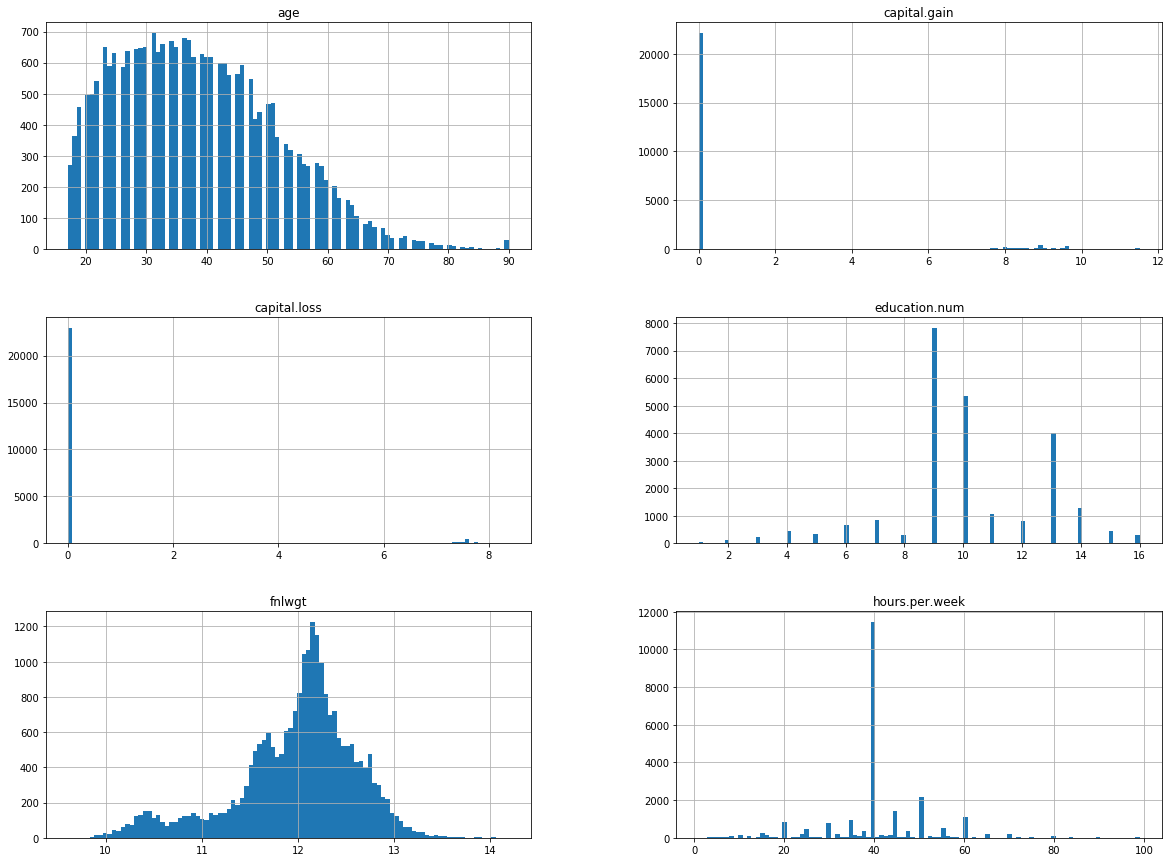

In [30]:
X_train[num_columns].hist(bins=100,figsize=(20,15));

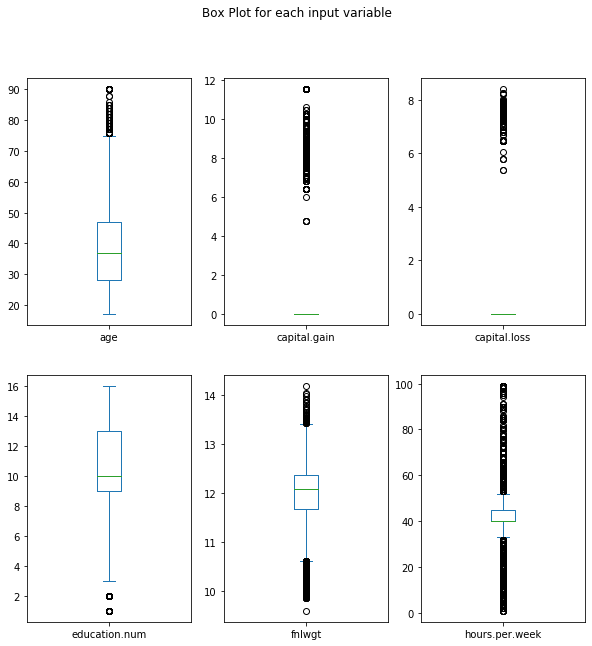

In [31]:
#Box Plot for each input variable
X_train[num_columns].plot(kind="box",subplots=True,figsize=(10,10),layout=(2,3),title="Box Plot for each input variable");

### `Dealing with outliers`

for fnlwgt variable :  Its a weight assigned by the Census Bureau. **The idea is that if two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking. **Say sample 7,12 and 33 are having similar fnlwgt values they are more likely to be of the same race, similar educational and social background, etc.. but if you are planning to use it, you should be aware that they are not standardized across different states. So someone in California might share similar fnlwgt with somebody in N Dakota but might have entirely different socio-economic background.

In [32]:
X_train[num_columns]

,age,capital.gain,capital.loss,education.num,fnlwgt,hours.per.week
511,37,0.000000,7.551187,9,12.147071,45
12699,44,0.000000,0.000000,10,11.560696,58
1563,38,11.512925,0.000000,14,12.178367,60
9729,19,0.000000,0.000000,9,12.493640,30
21489,62,0.000000,0.000000,10,11.872786,60
...,...,...,...,...,...,...
14001,28,0.000000,0.000000,11,11.696380,40
4720,18,0.000000,0.000000,9,12.588706,45
16557,43,0.000000,0.000000,10,11.962382,40
1244,31,0.000000,7.365180,10,12.009108,40


In [33]:
np.sqrt(4)

2.0

In [34]:
# np.log(X_train["capital.gain"][X_train["capital.gain"]>0].min())

In [35]:
# np.log((X_train["capital.loss"][X_train["capital.loss"]>0]).min())

In [36]:
(X_train["capital.gain"][X_train["capital.gain"]==0])=np.sqrt(X_train["capital.gain"][X_train["capital.gain"]>0].min())
(X_test["capital.gain"][X_test["capital.gain"]==0])=np.sqrt(X_test["capital.gain"][X_test["capital.gain"]>0].min())

(X_train["capital.loss"][X_train["capital.loss"]==0])=np.sqrt(X_train["capital.loss"][X_train["capital.loss"]>0].min())
(X_test["capital.loss"][X_test["capital.loss"]==0])=np.sqrt(X_test["capital.loss"][X_test["capital.loss"]>0].min())


In [37]:
(X_train["hours.per.week"][X_train["hours.per.week"]>90])= 90
(X_test["hours.per.week"][X_test["hours.per.week"]>90])=90

# # X_test[col][X_test[col]<lower]=np.sqrt((X_test[col][X_test[col]<lower])+1)
# # X_test[col][X_test[col]>upper]=np.sqrt((X_test[col][X_test[col]>upper])+1)

In [38]:
num_columns

['age',
 'capital.gain',
 'capital.loss',
 'education.num',
 'fnlwgt',
 'hours.per.week']

In [39]:
# ##clamping_ouliers
# for col in num_columns:

#     Q1 = np.percentile(X_train[col], 25) 

#     Q3 = np.percentile(X_train[col], 75) 
#     IQR = Q3 - Q1 
#     upper = Q3+5*IQR
#     lower = Q1-5*IQR
#     X_train[col][X_train[col]<lower]= lower
#     X_train[col][X_train[col]>upper]=upper

#     X_test[col][X_test[col]<lower]=lower
#     X_test[col][X_test[col]>upper]=upper

In [40]:
# Q1 = np.percentile(X_train['hours.per.week'], 25) 

# Q3 = np.percentile(X_train['hours.per.week'], 75) 
# IQR = Q3 - Q1 
# upper = Q3+1.5*IQR
# lower = Q1-1.5*IQR

In [41]:
# X_train['hours.per.week'][X_train['hours.per.week']<lower]

In [42]:
# X_train['hours.per.week'][X_train['hours.per.week']<lower]=np.log(X_train['hours.per.week'][X_train['hours.per.week']<lower])

In [43]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,24129.0,38.454474,13.122602,17.000000,28.000000,37.000000,47.000000,90.000000
fnlwgt,24129.0,11.982343,0.631194,9.607706,11.673189,12.092064,12.376005,14.190816
education.num,24129.0,10.113515,2.556718,1.000000,9.000000,10.000000,13.000000,16.000000
capital.gain,24129.0,2.736862,1.867613,2.178287,2.178287,2.178287,2.178287,11.512925
capital.loss,24129.0,2.563656,1.107252,2.316458,2.316458,2.316458,2.316458,8.379539
hours.per.week,24129.0,40.869617,11.775953,1.000000,40.000000,40.000000,45.000000,90.000000
id,24129.0,15100.364292,8717.774986,0.000000,7538.000000,15127.000000,22649.000000,30161.000000


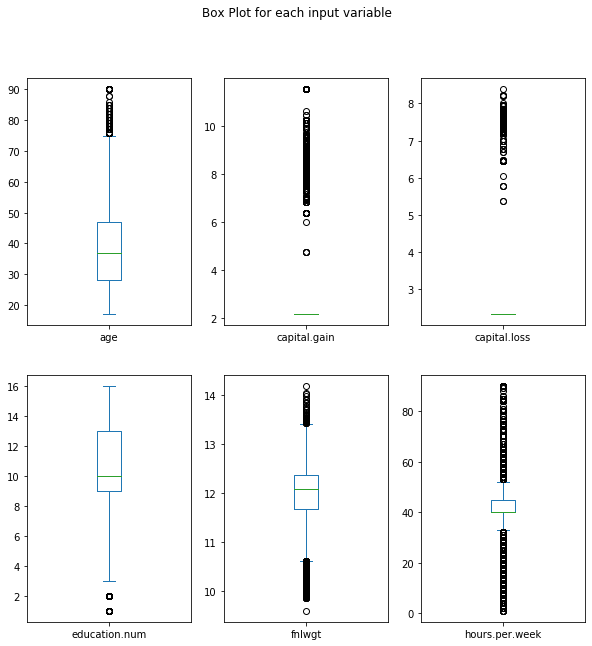

In [44]:
#Box Plot for each input variable
X_train[num_columns].plot(kind="box",subplots=True,figsize=(10,10),layout=(2,3),title="Box Plot for each input variable");

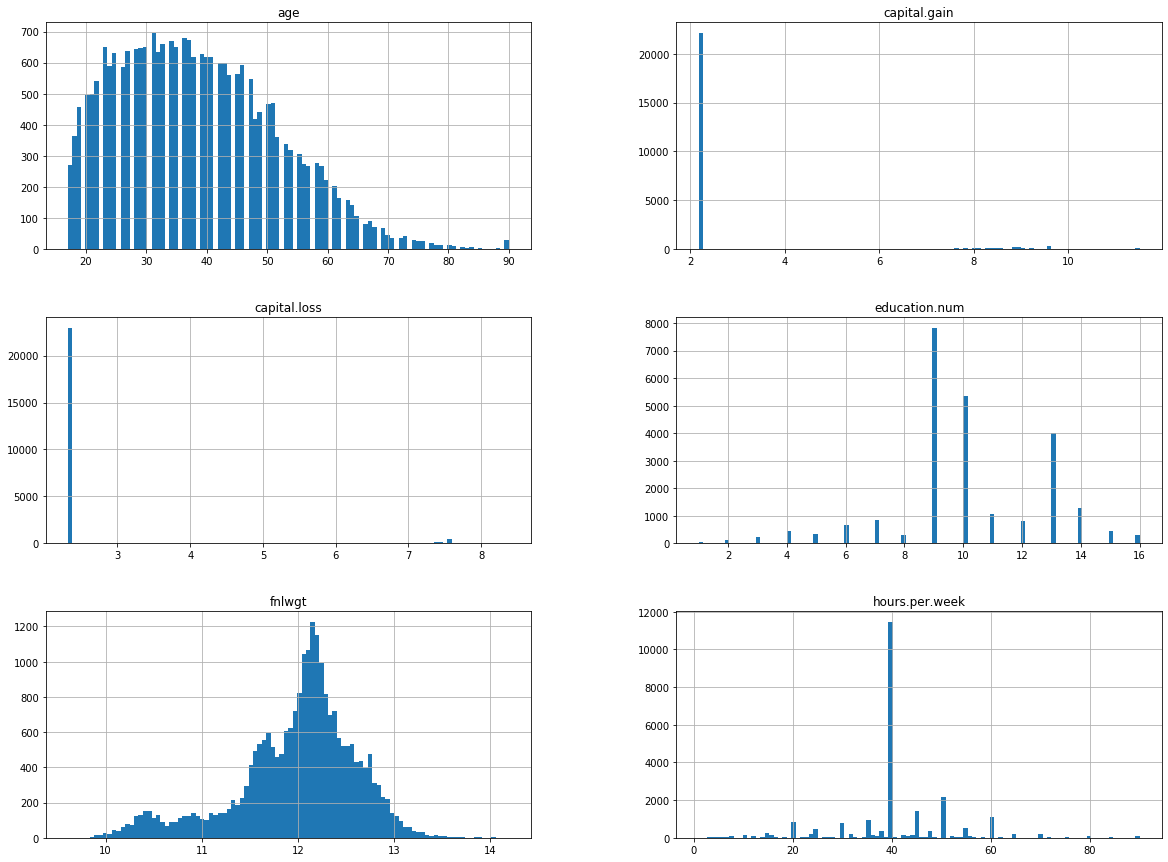

In [45]:
X_train[num_columns].hist(bins=100,figsize=(20,15));

In [46]:
X_train[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,24129.0,38.454474,13.122602,17.000000,28.000000,37.000000,47.000000,90.000000
capital.gain,24129.0,2.736862,1.867613,2.178287,2.178287,2.178287,2.178287,11.512925
capital.loss,24129.0,2.563656,1.107252,2.316458,2.316458,2.316458,2.316458,8.379539
education.num,24129.0,10.113515,2.556718,1.000000,9.000000,10.000000,13.000000,16.000000
fnlwgt,24129.0,11.982343,0.631194,9.607706,11.673189,12.092064,12.376005,14.190816
hours.per.week,24129.0,40.869617,11.775953,1.000000,40.000000,40.000000,45.000000,90.000000


In [47]:
len(X_train["hours.per.week"][X_train["hours.per.week"]>90])

0

In [48]:
X_train.shape

(24129, 15)

In [49]:
num_columns

['age',
 'capital.gain',
 'capital.loss',
 'education.num',
 'fnlwgt',
 'hours.per.week']

## `scaling `

In [50]:
""" Testing the normally distributed features using Shapiro-Wilk test
 the null hypothesis here is that the data follows a normal distribution
 we reject the null hypothesis (aka: data is not normally distributed) if the p-value is less than alpha (typically 5%)
 and we fail to reject the null hypothesis (aka: data is normally distributes) if the p-value is greater than alpha """
feats_std_scale = []
feats_min_max_scale = []
sample_data  = X_train.sample(replace = False, n= 500)

from scipy.stats import shapiro
for col in num_columns:
    stat, p = shapiro(sample_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.001
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        feats_min_max_scale.append(col)

W_Statistic=0.964, p=0.00000000
age does not look Gaussian (reject H0)
W_Statistic=0.344, p=0.00000000
capital.gain does not look Gaussian (reject H0)
W_Statistic=0.153, p=0.00000000
capital.loss does not look Gaussian (reject H0)
W_Statistic=0.925, p=0.00000000
education.num does not look Gaussian (reject H0)
W_Statistic=0.951, p=0.00000000
fnlwgt does not look Gaussian (reject H0)
W_Statistic=0.892, p=0.00000000
hours.per.week does not look Gaussian (reject H0)


In [51]:
feats_min_max_scale

['age',
 'capital.gain',
 'capital.loss',
 'education.num',
 'fnlwgt',
 'hours.per.week']

In [52]:
# import statsmodels.api as sm
# ncols = 2
# nrows=2
# fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 10))
# i=0
# j=0
# for col in num_columns:
#     sm.qqplot(X_train[col],fit = False, line='q', ax = axes[i, j])
#     axes[i, j].set_title(col)
#     if(j<ncols-1):
#         j+=1
#     else:
#         i+=1
#         j=0
# plt.show()

In [53]:
X_test[feats_min_max_scale]

,age,capital.gain,capital.loss,education.num,fnlwgt,hours.per.week
22281,61,2.178287,2.247188,13,11.997805,40
5412,42,2.178287,2.247188,14,12.299353,38
13942,28,2.178287,2.247188,14,11.850176,50
25959,55,2.178287,2.247188,13,12.454244,40
6964,52,2.178287,2.247188,9,12.008451,50
...,...,...,...,...,...,...
23939,45,2.178287,2.247188,13,12.950357,40
29054,21,2.178287,2.247188,9,10.844725,35
12102,17,2.178287,2.247188,7,12.137140,12
12100,47,2.178287,2.247188,9,12.115891,35


In [54]:
# scaler = MinMaxScaler()
# scaler.fit(X_train[feats_min_max_scale])
# X_train[feats_min_max_scale]=scaler.transform(X_train[feats_min_max_scale])
# X_test[feats_min_max_scale]=scaler.transform(X_test[feats_min_max_scale])


In [55]:
X_test[num_columns]

,age,capital.gain,capital.loss,education.num,fnlwgt,hours.per.week
22281,61,2.178287,2.247188,13,11.997805,40
5412,42,2.178287,2.247188,14,12.299353,38
13942,28,2.178287,2.247188,14,11.850176,50
25959,55,2.178287,2.247188,13,12.454244,40
6964,52,2.178287,2.247188,9,12.008451,50
...,...,...,...,...,...,...
23939,45,2.178287,2.247188,13,12.950357,40
29054,21,2.178287,2.247188,9,10.844725,35
12102,17,2.178287,2.247188,7,12.137140,12
12100,47,2.178287,2.247188,9,12.115891,35


## `encoding`

In [56]:
nominal_cats=["native.country","race","workclass","relationship","sex","marital.status","occupation"]
ordinal_cats=["income"]

In [57]:
index_=list(X_test[X_test["native.country"]=='Holand-Netherlands'].index)
X_test=X_test.drop( index_,axis=0)

In [58]:
nominal_train_data=pd.get_dummies(X_train[nominal_cats],drop_first=True)
nominal_test_data=pd.get_dummies(X_test[nominal_cats],drop_first=True)

In [59]:
from sklearn.preprocessing import LabelEncoder as lb


In [60]:
for col in ordinal_cats:
    encoder = lb().fit(X_train[col])
    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


In [61]:
num_columns=list(set(X_train.describe().columns)-set(["id"]))


In [62]:
num_columns

['age',
 'capital.gain',
 'capital.loss',
 'income',
 'education.num',
 'fnlwgt',
 'hours.per.week']

In [63]:
X_final_test=pd.concat([nominal_test_data,X_test[num_columns]],axis=1)
X_final_train=pd.concat([nominal_train_data,X_train[num_columns]],axis=1)

In [64]:
X_final_train.shape,X_final_test.shape

((24129, 81), (6032, 81))

In [65]:
X_final_train

,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Male,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,age,capital.gain,capital.loss,income,education.num,fnlwgt,hours.per.week
511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,37,2.178287,7.551187,1,9,12.147071,45
12699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,44,2.178287,2.316458,1,10,11.560696,58
1563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,38,11.512925,2.316458,1,14,12.178367,60
9729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19,2.178287,2.316458,0,9,12.493640,30
21489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,62,2.178287,2.316458,0,10,11.872786,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,28,2.178287,2.316458,0,11,11.696380,40
4720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18,2.178287,2.316458,0,9,12.588706,45
16557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,43,2.178287,2.316458,0,10,11.962382,40
1244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,31,2.178287,7.365180,0,10,12.009108,40


In [66]:
num_columns=list(set(X_final_train.describe().columns)-set(["id"]))


## ` subset selection  `

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS

In [68]:
num=['hours.per.week',
 'fnlwgt',
 'age',
 'education.num']
num

['hours.per.week', 'fnlwgt', 'age', 'education.num']

In [69]:
X_final_train[num]

,hours.per.week,fnlwgt,age,education.num
511,45,12.147071,37,9
12699,58,11.560696,44,10
1563,60,12.178367,38,14
9729,30,12.493640,19,9
21489,60,11.872786,62,10
...,...,...,...,...
14001,40,11.696380,28,11
4720,45,12.588706,18,9
16557,40,11.962382,43,10
1244,40,12.009108,31,10


In [70]:
feats_high_vif_to_be_dropped = []
cleaned_df_from_multi_coll = X_final_train[num]
num_cols_removed = 0

for origin_df_feat_index in range(len(X_final_train[num].columns)):
    
    num_cols_removed = X_final_train[num].shape[1] - cleaned_df_from_multi_coll.shape[1]
    cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
    VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
    
    if VIF_FEAT > 20:

        feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
        cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])

In [71]:
feats_high_vif_to_be_dropped

['fnlwgt']

In [72]:
X_final_train=X_final_train.drop(columns =feats_high_vif_to_be_dropped)
X_final_test=X_final_test.drop(columns =feats_high_vif_to_be_dropped)

In [73]:
# cleaned_test_from_multi_coll=X_final_test.drop(columns =feats_high_vif_to_be_dropped)

In [74]:
# cleaned_test_from_multi_coll.shape

In [75]:
# num_columns=list(set(cleaned_df_from_multi_coll.describe().columns)-set(["id"]))


In [76]:
y_train = X_final_train[["income"]]
X_train = X_final_train[list(set(X_final_train.columns) - set(['income']))]

y_test = X_final_test[["income"]]
X_test = X_final_test[list(set(X_final_test.columns) - set(['income']))]

In [77]:
# y_train = cleaned_df_from_multi_coll[["income"]]
# X_train = cleaned_df_from_multi_coll[list(set(cleaned_df_from_multi_coll.columns) - set(['income']))]

# y_test = cleaned_test_from_multi_coll[["income"]]
# X_test = cleaned_test_from_multi_coll[list(set(cleaned_test_from_multi_coll.columns) - set(['income']))]

In [78]:
# significant_feats_df = X_train
# LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
# insignificant_feats_ls = []

# while LRresult['P>|t|'].max() > 0.05:
#     insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
#     insignificant_feats_ls.append(insignificant_feat)
#     significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
#     LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [79]:
# (insignificant_feats_ls)

In [80]:
# significant_feats_df

In [81]:
# significant_feats_test=X_test.drop(columns =insignificant_feats_ls)

In [82]:
# significant_feats_test.shape,significant_feats_df.shape

In [83]:
# X_final_train=significant_feats_df.copy()
# X_final_test=significant_feats_test.copy()

In [84]:
X_final_train=X_train.copy()
X_final_test=X_test.copy()

## `final scaling`

In [85]:
# train_unscaled=significant_feats_df.copy()
# test_unscaled=significant_feats_test.copy()


In [86]:
train_unscaled=X_train.copy()
test_unscaled=X_test.copy()


In [87]:
test_unscaled

,native.country_Japan,relationship_Not-in-family,native.country_Greece,occupation_Sales,native.country_Scotland,occupation_Protective-serv,occupation_Machine-op-inspct,sex_Male,occupation_Armed-Forces,race_Black,occupation_Craft-repair,workclass_Self-emp-inc,native.country_England,native.country_Ireland,native.country_Mexico,native.country_Yugoslavia,occupation_Priv-house-serv,native.country_Trinadad&Tobago,occupation_Handlers-cleaners,native.country_Outlying-US(Guam-USVI-etc),native.country_Ecuador,capital.gain,native.country_Poland,native.country_Peru,marital.status_Married-civ-spouse,native.country_Puerto-Rico,education.num,marital.status_Widowed,native.country_China,native.country_Portugal,occupation_Other-service,relationship_Other-relative,native.country_United-States,workclass_Private,marital.status_Never-married,workclass_Local-gov,workclass_Without-pay,native.country_South,hours.per.week,marital.status_Married-AF-spouse,relationship_Wife,age,race_White,workclass_State-gov,native.country_France,native.country_Hong,native.country_Cuba,occupation_Farming-fishing,native.country_Jamaica,capital.loss,native.country_Philippines,native.country_Italy,native.country_Nicaragua,native.country_El-Salvador,native.country_Haiti,native.country_Honduras,native.country_Thailand,native.country_Canada,native.country_Laos,occupation_Exec-managerial,native.country_Guatemala,occupation_Prof-specialty,race_Asian-Pac-Islander,native.country_Iran,native.country_Germany,occupation_Tech-support,native.country_Columbia,occupation_Transport-moving,native.country_Vietnam,relationship_Unmarried,workclass_Self-emp-not-inc,native.country_Hungary,native.country_Dominican-Republic,native.country_Taiwan,race_Other,marital.status_Separated,native.country_India,relationship_Own-child,marital.status_Married-spouse-absent
22281,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,1,0,13,0,0,0,0,0,1,1,0,0,0,0,40,0,0,61,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5412,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,0,0,14,0,0,0,0,0,1,0,0,0,0,0,38,0,0,42,1,1,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13942,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,0,0,14,0,0,0,0,0,1,1,0,0,0,0,50,0,0,28,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25959,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,40,0,0,55,0,1,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6964,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,1,0,9,0,0,0,0,0,1,1,0,0,0,0,50,0,0,52,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23939,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,1,0,13,0,0,0,0,0,1,0,0,0,0,0,40,0,0,45,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29054,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,0,0,9,0,0,0,1,0,1,1,1,0,0,0,35,0,0,21,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12102,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2.178287,0,0,0,0,7,0,0,0,0,0,1,1,1,0,0,0,12,0,0,17,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,1,0,9,0,0,0,0,0,0,0,0,0,0,0,35,0,1,47,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [88]:
feats_min_max_scale

['age',
 'capital.gain',
 'capital.loss',
 'education.num',
 'fnlwgt',
 'hours.per.week']

In [89]:
scaler = MinMaxScaler()
scaler.fit(X_final_train)
X_final_train=scaler.transform(X_final_train)
X_final_test=scaler.transform(X_final_test)

In [90]:
y_train = y_train
X_train = X_final_train

y_test = y_test
X_test = X_final_test

In [91]:
y_train.shape,X_train.shape,y_test.shape,X_test.shape

((24129, 1), (24129, 79), (6032, 1), (6032, 79))

## `dealing with imbalane`

In [92]:
y_train["income"].value_counts()

0    18092
1     6037
Name: income, dtype: int64

In [93]:
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_resample(X_train,y_train)

In [94]:
x_res.shape,y_res.shape

((34996, 79), (34996, 1))

In [95]:
y_res["income"].value_counts()

1    17498
0    17498
Name: income, dtype: int64

## `KNN Model`

### Trying different p values in the Minkowski distance metric -  p=1 , p=2

In [96]:
p=[1,2]
for i in p :

    model = KNeighborsClassifier(p=i, metric="minkowski").fit(x_res, y_res)
    y_pred_knn = model.predict(X_test)
    score=f1_score(y_test,y_pred_knn,average='macro')
    print(f"the f1_score at P ={i} is : {score }")


the f1_score at P =1 is : 0.7439743339103543
the f1_score at P =2 is : 0.734234739350571


### Trying different N_neighbors

In [97]:
np.arange(50,100,5)

array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])

#### `searching  for the best parameters`

In [98]:
scores=[]
p=[1,2]
k_ranges=np.arange(25,30,1)
weights=["uniform","distance"]
for a in p:
    for b in k_ranges:
        for c in weights:
                model = KNeighborsClassifier(n_neighbors=b,p=a, metric="minkowski",weights=c).fit(x_res, y_res)
                y_pred_knn = model.predict(X_test)
                score=f1_score(y_test,y_pred_knn,average='macro')
                scores.append([score,a,b,c])
                print(f"the f1_score at p ={a}  and n_neighbors ={b}  and weights ={c} is : {score }")
max(scores)

the f1_score at p =1  and n_neighbors =25  and weights =uniform is : 0.7462212944595124
the f1_score at p =1  and n_neighbors =25  and weights =distance is : 0.7499209814930339
the f1_score at p =1  and n_neighbors =26  and weights =uniform is : 0.7494206715661262
the f1_score at p =1  and n_neighbors =26  and weights =distance is : 0.7516512652643252
the f1_score at p =1  and n_neighbors =27  and weights =uniform is : 0.7446684587541261
the f1_score at p =1  and n_neighbors =27  and weights =distance is : 0.7490534610200398
the f1_score at p =1  and n_neighbors =28  and weights =uniform is : 0.7488552278864471
the f1_score at p =1  and n_neighbors =28  and weights =distance is : 0.7504618975972953
the f1_score at p =1  and n_neighbors =29  and weights =uniform is : 0.7458908422365458
the f1_score at p =1  and n_neighbors =29  and weights =distance is : 0.7492791625602342
the f1_score at p =2  and n_neighbors =25  and weights =uniform is : 0.7387859390751714
the f1_score at p =2  and n

[0.7516512652643252, 1, 26, 'distance']

#### the f1_score at p =1  and n_neighbors =26  and weights =distance is : 0.7516512652643252


## `Decision Tree Model`

#### `with scaled and imbalanced `

In [99]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((24129, 79), (6032, 79), (6032, 1), (24129, 1))

In [100]:
y_train["income"].value_counts()

0    18092
1     6037
Name: income, dtype: int64

#### `searching  for the best parameters with out  max_leaf_nodes and  ccp_alpha `

In [101]:
scores=[]
depth=np.arange(2,10,1)
split=np.arange(2,8,1)
leaf=np.arange(1,8,1)
max_features=np.arange(2,20,2)
max_leaf_nodes=np.arange(5,60,10)
ccp_alpha=[0.01,0.1,1,10,100,1000]
for a in depth :
    for b in split:
        for c in leaf :
            for d in max_features :
#                 for e in max_leaf_nodes:
#                     for f in ccp_alpha :
                        
                            model_tree = DecisionTreeClassifier(max_depth=a,min_samples_split=b ,   
                               min_samples_leaf=c , max_features=d,random_state=2022,class_weight={0:1,1:3}).fit(X_train, y_train)
                            y_pred_tree = model_tree.predict(X_test)
                            score=f1_score(y_test,y_pred_tree,average='macro')
                            scores.append([score,a,b,c,d])
#                             print(f"the f1_score at max_depth  ={a}  and  min_samples_split = {b}  and min_samples_leaf = {c} and max_features = {d}  and  max_leaf_nodes = {e} and ccp_alpha = {f}  is : {score } ")
max(scores)
                        


[0.7702462494630535, 9, 4, 1, 16]

#### the best parameters is   max_depth  =9  and  min_samples_split = 4  and min_samples_leaf = 1 and max_features = 16   and score is score = 0.7702462494630535

In [115]:
model_tree = DecisionTreeClassifier(max_depth=9,min_samples_split=4 ,   
min_samples_leaf=1 , max_features=16,random_state=2022,class_weight={0:1,1:3}).fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
score=f1_score(y_test,y_pred_tree,average='macro')
score

0.7704114021033122

In [103]:
scores=[]
depth=np.arange(2,10,1)
split=np.arange(2,8,1)
leaf=np.arange(1,8,1)
max_features=np.arange(2,20,2)
max_leaf_nodes=np.arange(5,60,10)
ccp_alpha=[0.01,0.1,1,10,100,1000]
for a in depth :
    for b in split:
        for c in leaf :
            for d in max_features :
                for e in max_leaf_nodes:
                    for f in ccp_alpha :
                        
                            model_tree = DecisionTreeClassifier(max_depth=a,min_samples_split=b ,   
                               min_samples_leaf=c , max_features=d,max_leaf_nodes=e,ccp_alpha= f,random_state=2022,class_weight={0:1,1:3}).fit(X_train, y_train)
                            y_pred_tree = model_tree.predict(X_test)
                            score=f1_score(y_test,y_pred_tree,average='macro')
                            scores.append([score,a,b,c,d,e,f])
#                             print(f"the f1_score at max_depth  ={a}  and  min_samples_split = {b}  and min_samples_leaf = {c} and max_features = {d}  and  max_leaf_nodes = {e} and ccp_alpha = {f}  is : {score } ")
max(scores)
                        


[0.7354129921397219, 9, 3, 1, 4, 55, 0.01]

#### the performance didnot improve when adding max_leaf_nodes  and ccp_alpha 

#### `with unscaled and imbalanced `

In [116]:
y_train = y_train
X_train = train_unscaled

y_test = y_test
X_test = test_unscaled

In [105]:
test_unscaled

,native.country_Japan,relationship_Not-in-family,native.country_Greece,occupation_Sales,native.country_Scotland,occupation_Protective-serv,occupation_Machine-op-inspct,sex_Male,occupation_Armed-Forces,race_Black,occupation_Craft-repair,workclass_Self-emp-inc,native.country_England,native.country_Ireland,native.country_Mexico,native.country_Yugoslavia,occupation_Priv-house-serv,native.country_Trinadad&Tobago,occupation_Handlers-cleaners,native.country_Outlying-US(Guam-USVI-etc),native.country_Ecuador,capital.gain,native.country_Poland,native.country_Peru,marital.status_Married-civ-spouse,native.country_Puerto-Rico,education.num,marital.status_Widowed,native.country_China,native.country_Portugal,occupation_Other-service,relationship_Other-relative,native.country_United-States,workclass_Private,marital.status_Never-married,workclass_Local-gov,workclass_Without-pay,native.country_South,hours.per.week,marital.status_Married-AF-spouse,relationship_Wife,age,race_White,workclass_State-gov,native.country_France,native.country_Hong,native.country_Cuba,occupation_Farming-fishing,native.country_Jamaica,capital.loss,native.country_Philippines,native.country_Italy,native.country_Nicaragua,native.country_El-Salvador,native.country_Haiti,native.country_Honduras,native.country_Thailand,native.country_Canada,native.country_Laos,occupation_Exec-managerial,native.country_Guatemala,occupation_Prof-specialty,race_Asian-Pac-Islander,native.country_Iran,native.country_Germany,occupation_Tech-support,native.country_Columbia,occupation_Transport-moving,native.country_Vietnam,relationship_Unmarried,workclass_Self-emp-not-inc,native.country_Hungary,native.country_Dominican-Republic,native.country_Taiwan,race_Other,marital.status_Separated,native.country_India,relationship_Own-child,marital.status_Married-spouse-absent
22281,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,1,0,13,0,0,0,0,0,1,1,0,0,0,0,40,0,0,61,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5412,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,0,0,14,0,0,0,0,0,1,0,0,0,0,0,38,0,0,42,1,1,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13942,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,0,0,14,0,0,0,0,0,1,1,0,0,0,0,50,0,0,28,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25959,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,40,0,0,55,0,1,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6964,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,1,0,9,0,0,0,0,0,1,1,0,0,0,0,50,0,0,52,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23939,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,1,0,13,0,0,0,0,0,1,0,0,0,0,0,40,0,0,45,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29054,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,0,0,9,0,0,0,1,0,1,1,1,0,0,0,35,0,0,21,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12102,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2.178287,0,0,0,0,7,0,0,0,0,0,1,1,1,0,0,0,12,0,0,17,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.178287,0,0,1,0,9,0,0,0,0,0,0,0,0,0,0,0,35,0,1,47,1,0,0,0,0,0,0,2.247188,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [106]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((6032, 79), (24129, 79), (6032, 1), (24129, 1))

In [107]:
y_train["income"].value_counts()

0    18092
1     6037
Name: income, dtype: int64

In [118]:
# #best model now :
model_tree = DecisionTreeClassifier(max_depth=9,random_state=2022,class_weight={0:1,1:3},min_samples_split=4 ,   
min_samples_leaf=1 ,max_features=16
                                   ).fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
score=f1_score(y_test,y_pred_tree,average='macro')
print(f"the f1_score is  : {score }")

the f1_score is  : 0.7704114021033122


#### "the same score even i did not scaled the data" 

In [109]:
ff=list(X_train.columns)
class_names=np.array(['<=50K','>50K'])
class_names

array(['<=50K', '>50K'], dtype='<U5')

In [119]:
#adjust the tree to become more clear
model_tree = DecisionTreeClassifier(max_depth=3,random_state=2022,class_weight={0:1,1:3},min_samples_split=5 ,   
min_samples_leaf=5 ,max_features=20                                  ).fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)


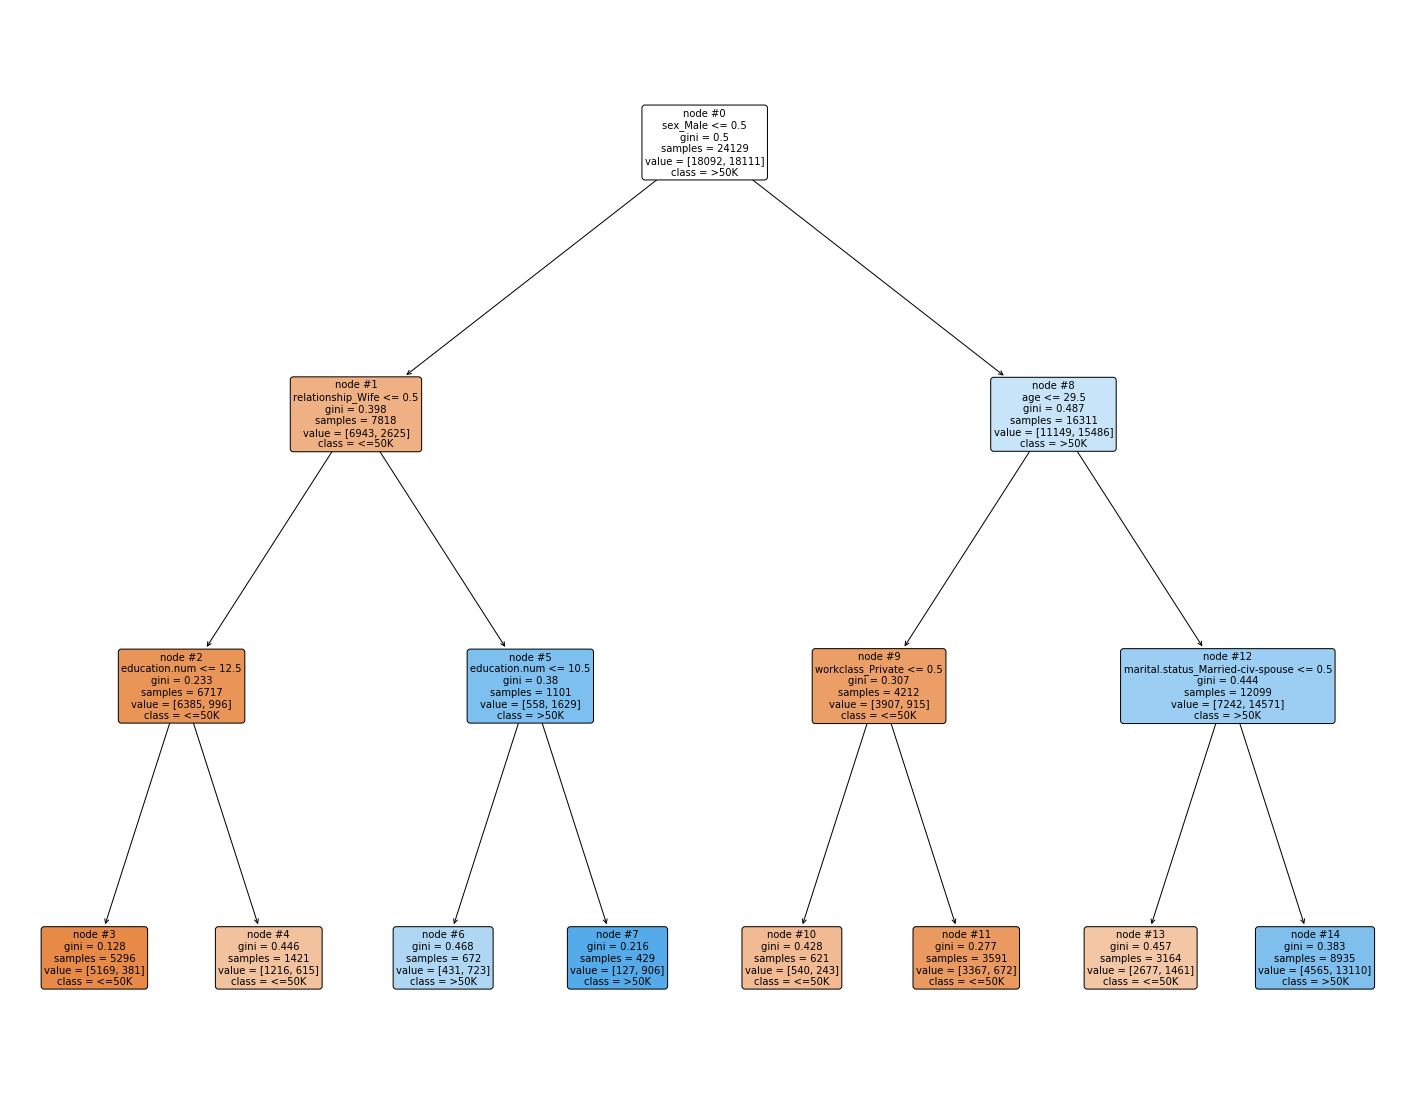

In [120]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree, 
                   feature_names=ff,  
                   class_names=class_names,
                 filled=True,rounded=True,node_ids=True,fontsize =10)

### `Random Forest model`

#### `searching for best parameters `

In [121]:
scores=[]
n_estimators=[5,10,20,30]
samples=[1000,1500,2000,2500,3000,3500]
for n in n_estimators:
    for s in samples:

        model_tree = RandomForestClassifier(max_depth=9,random_state=2022,class_weight={0:1,1:3},min_samples_split=4 ,   
        min_samples_leaf=1 ,max_features=16,n_estimators=n,bootstrap = True,max_samples=s).fit(X_train, y_train)
        y_pred_tree = model_tree.predict(X_test)
        score=f1_score(y_test,y_pred_tree,average='macro')
        scores.append([score,n,s])
        print(f"the f1_score is  : {score } at  n_estimators = {n} and max_samples = {s} ")

max(scores)

the f1_score is  : 0.7572208063033674 at  n_estimators = 5 and max_samples = 1000 
the f1_score is  : 0.7673301461708573 at  n_estimators = 5 and max_samples = 1500 
the f1_score is  : 0.7589995917976944 at  n_estimators = 5 and max_samples = 2000 
the f1_score is  : 0.753868795271796 at  n_estimators = 5 and max_samples = 2500 
the f1_score is  : 0.7576683809421617 at  n_estimators = 5 and max_samples = 3000 
the f1_score is  : 0.769615820221704 at  n_estimators = 5 and max_samples = 3500 
the f1_score is  : 0.7649861661686788 at  n_estimators = 10 and max_samples = 1000 
the f1_score is  : 0.768658196373992 at  n_estimators = 10 and max_samples = 1500 
the f1_score is  : 0.7660078241897867 at  n_estimators = 10 and max_samples = 2000 
the f1_score is  : 0.7628861893465395 at  n_estimators = 10 and max_samples = 2500 
the f1_score is  : 0.7600055118140276 at  n_estimators = 10 and max_samples = 3000 
the f1_score is  : 0.7707340090217616 at  n_estimators = 10 and max_samples = 3500 
t

[0.7724719379084861, 30, 2000]

#### the best parameters  at  n_estimators = 30 and max_samples =2000  and score = 0.7724719379084861